In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from quant_met import hamiltonians
from quant_met.minimize_free_energy import minimize_loop
from quant_met import plotting
from quant_met.bcs import find_fixpoint

In [29]:
lattice_constant = np.sqrt(3)

all_K_points = 4 * np.pi / (3 * lattice_constant) * np.array([
    (np.sin(i * np.pi / 6), np.cos(i * np.pi / 6)) for i in [1, 3, 5, 7, 9, 11]]
)

Gamma = np.array([0, 0])
M = np.pi / lattice_constant * np.array([1, 1 / np.sqrt(3)])
K = 4 * np.pi / (3 * lattice_constant) * np.array([1, 0])

#egx_h = hamiltonians.EGXHamiltonian(t_gr=1, t_x=0.01, V=0, a=lattice_constant, mu=-2.5, U_gr=1, U_x=1)
graphene_h = hamiltonians.GrapheneHamiltonian(t_nn=1, a=lattice_constant, mu=-1, coulomb_gr=2)

#mat = egx_h.diagonalize_bdg(K, [1, 1, 1])
with np.printoptions(suppress=True, precision=3):
    bdg_energies, w_matrix = graphene_h.diagonalize_bdg(Gamma, [1, 2])
    
print(bdg_energies)

[-4.40157512 -2.37194782  2.37194782  4.40157512]


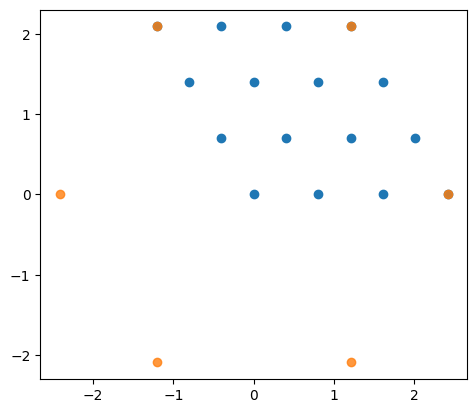

In [18]:
BZ_grid = find_fixpoint.generate_k_space_grid(4, 4, all_K_points[1], all_K_points[5])

BZ_grid_plot = plotting.plot_into_bz(all_K_points, BZ_grid)

In [19]:
beta = 20

solution = minimize_loop(beta=beta, hamiltonian=graphene_h, k_points=BZ_grid)
print(solution)

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.46092D-01    |proj g|=  7.06261D-02
0.24130166935817446

At iterate    1    f= -4.58899D-01    |proj g|=  1.09227D-01
  ys=-5.452E-03  -gs= 9.976E-03 BFGS update SKIPPED
14.142134191167784

At iterate    2    f= -1.98967D+01    |proj g|=  2.02595D-06
  ys=-3.051E+01  -gs= 2.147E+00 BFGS update SKIPPED
14.142135623730951
  message: CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL
  success: True
   status: 0
      fun: -19.896706067075556
        x: [ 1.000e+01  1.000e+01]
      nit: 3
      jac: [-1.661e+00 -1.661e+00]
     nfev: 24
     njev: 8
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>

At iterate    3    f= -1.98967D+01    |proj g|=  0.00000D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explo

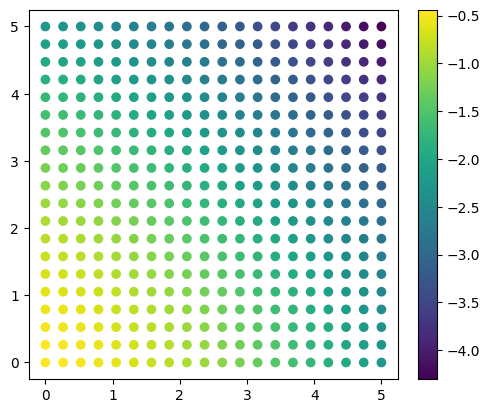

In [34]:
from quant_met.minimize_free_energy import free_energy

beta = 100

data = []

graphene_h = hamiltonians.GrapheneHamiltonian(t_nn=1, a=lattice_constant, mu=-1, coulomb_gr=20)

delta_list = find_fixpoint.generate_k_space_grid(20, 20, np.array([0, 5]), np.array([5, 0]))

for delta in delta_list:
    data.append(free_energy(delta_vector=delta, beta=beta, hamiltonian=graphene_h, k_points=BZ_grid))

fig, ax = plt.subplots()

scatter = ax.scatter(*zip(*delta_list), c=data, cmap="viridis")
fig.colorbar(scatter, ax=ax, fraction=0.046, pad=0.04)

ax.set_aspect("equal", adjustable="box")